In [2]:
from useful_scit.imps import *

In [3]:
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)

In [4]:
path = '/Volumes/mbProD/Downloads/wrf_small_files'

In [5]:
glob.glob(path+'/wrf*')

['/Volumes/mbProD/Downloads/wrf_small_files/wrfbdy_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrffdda_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrfinput_d01',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrflowinp_d01']

In [6]:
file_path = os.path.join(path,'wrflowinp_d01')

In [88]:
xa = xr.open_dataset(file_path)

In [11]:
xa1 = xa.isel(Time=0)

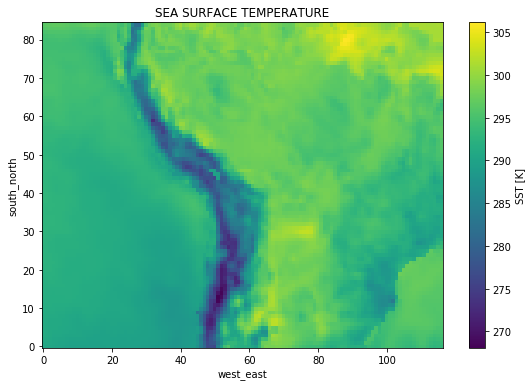

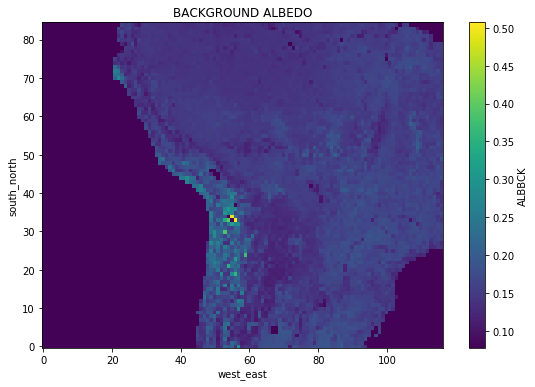

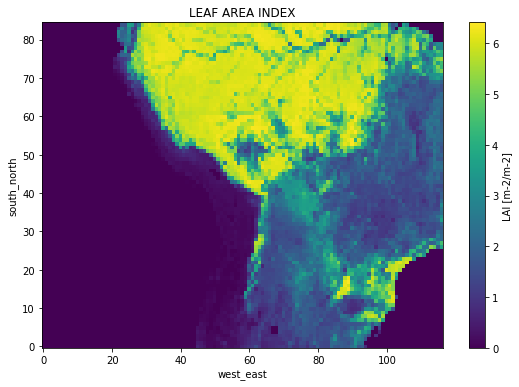

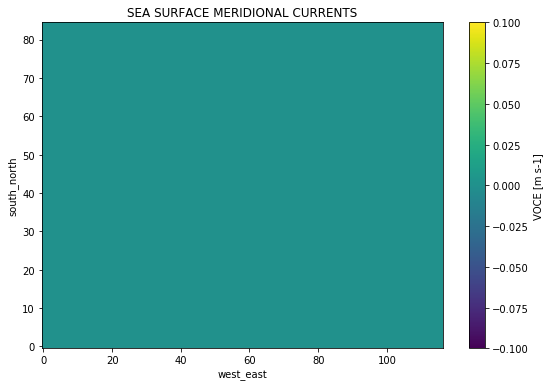

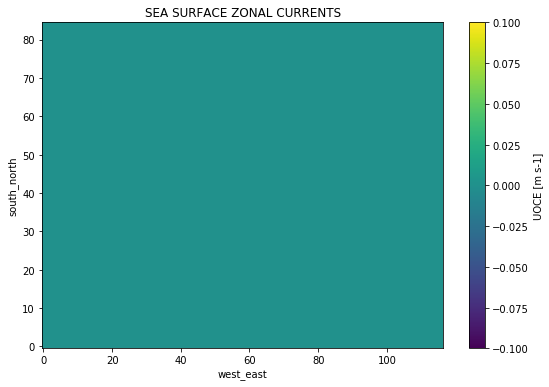

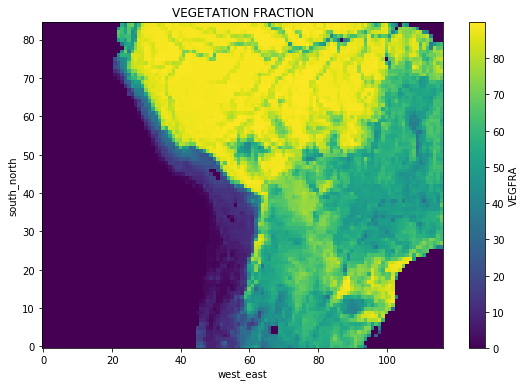

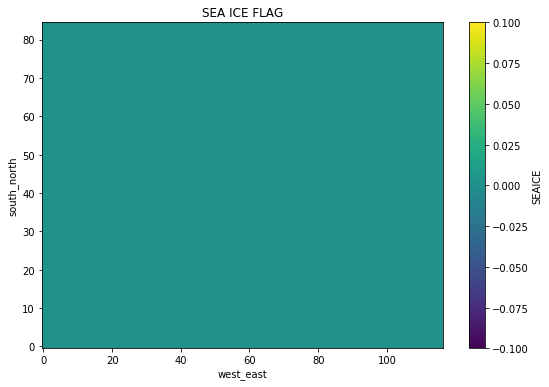

In [14]:
pars = ['SST','ALBBCK','LAI','VOCE','UOCE','VEGFRA','SEAICE']
for p in pars:
    plt.figure()
    xa1[p].plot()
    ax = plt.gca()
    ax.set_title(xa1[p].description)

In [133]:
pars = ['SST']
names = ['_q95','_q05','_q50','_mean']

for p in pars:
    np = [p+n for n in names]
    xa[p+'_q95'] = xa[p].quantile(.95,dim=['south_north','west_east'])
    xa[p+'_q05'] = xa[p].quantile(.05,dim=['south_north','west_east'])
    xa[p+'_q50'] = xa[p].quantile(.5,dim=['south_north','west_east'])
    xa[p+'_mean'] = xa[p].mean(dim=['south_north','west_east'])

In [134]:
np

['SST_q95', 'SST_q05', 'SST_q50', 'SST_mean']

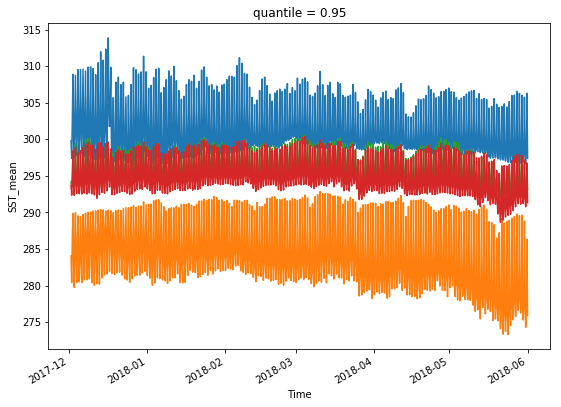

In [135]:
for pp in np:
    xa[pp].plot()

In [265]:
from sklearn.cluster import KMeans

In [217]:
def scale(x, out_range=(0, 1)):
    domain = np.quantile(x,.05), np.quantile(x,.95)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

In [271]:
file_lowinp = '/Volumes/mbProD/Downloads/wrf_small_files/wrflowinp_d01'

In [272]:
file_input = '/Volumes/mbProD/Downloads/wrf_small_files/wrfinput_d01' 

In [351]:
xa_low = import_lowinp(file_lowinp,file_input)

In [405]:
p = 'SST'
p_c = p+'_clus'
nc = 8 
xa_low[p_c]=get_cluster(xa_low,p,nc)

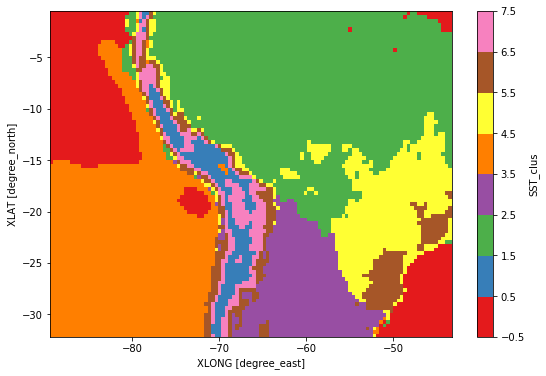

In [406]:
plot_clus(xa_low,'SST_clus',nc)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a

(270, 310)

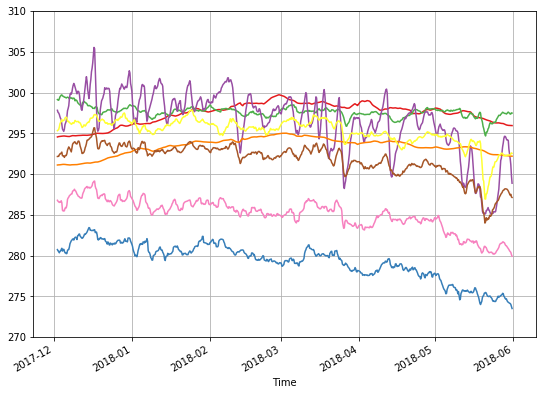

In [411]:
x2 = xa_low[[p,p_c]].rolling(Time=4,center=True,min_periods=4).mean()
line_plot_clus(x2,nc,p,p_c)
ax = plt.gca()
ax.set_xlim(736655.95, 736855.05)
ax.set_ylim(270,310)

In [381]:
x1 = xa_low.where(xa_low.LAKEMASK==1)
p = 'SST'
nc = 6
p_c = p+'_clus_lake'

In [379]:
 
xa_low[p_c]=get_cluster(x1,p,nc)

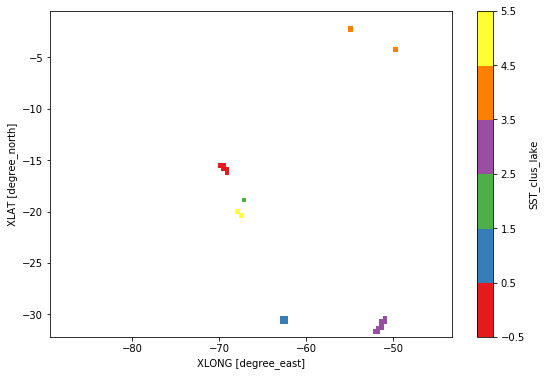

In [382]:
plot_clus(xa_low,p_c,nc)

(270, 310)

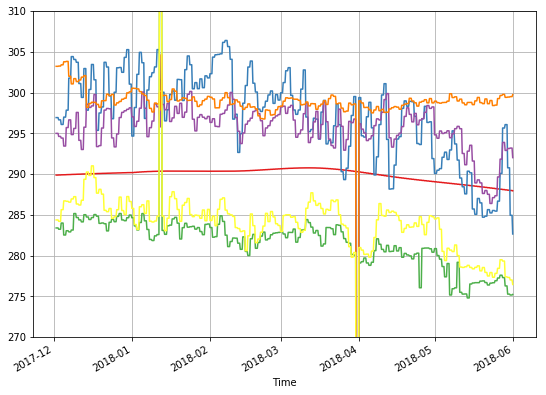

In [402]:
line_plot_clus(xa_low,nc,p,p_c)
ax = plt.gca()
ax.set_ylim(270,310)

In [431]:
p = 'ALBBCK'
p_c = p+'_clus'
nc = 7 
xa_low[p_c]=get_cluster(xa_low,p,nc)

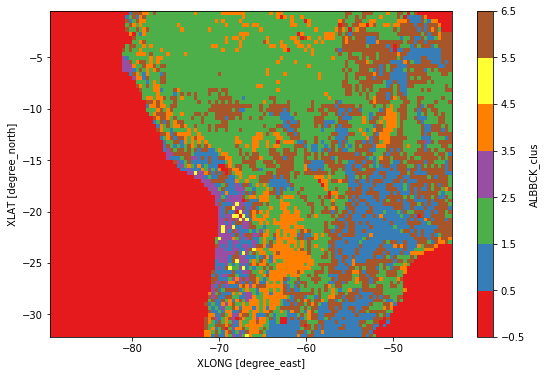

In [432]:
plot_clus(xa_low,p_c,nc)

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a

(736655.95, 736855.05)

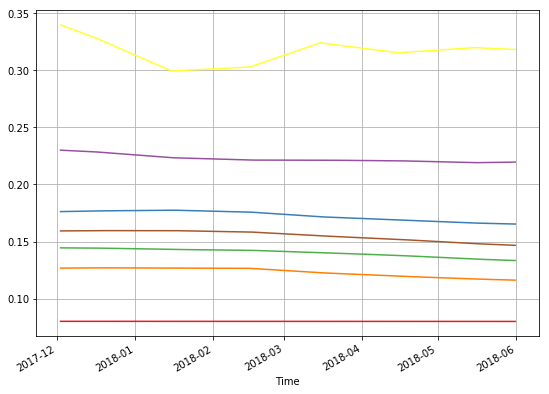

In [433]:
x2 = xa_low[[p,p_c]].rolling(Time=4,center=True,min_periods=4).mean()
line_plot_clus(x2,nc,p,p_c)
ax = plt.gca()
ax.set_xlim(736655.95, 736855.05)
# ax.set_ylim(270,310)